In [2]:
from IPython.display import display, HTML

# Membuat tampilan UI
ui_html = f"""
<div style="
    display: flex;
    justify-content: center;
    align-items: center;
    height: 200px;
    border: 2px solid #4CAF50;
    border-radius: 15px;
    background: linear-gradient(135deg, #4CAF50, #81C784);
    color: white;
    font-family: Arial, sans-serif;
    text-align: center;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2);
">
    <div>
        <h1 style="margin: 0; font-size: 2.5rem;">Nama: Anda Figo Haq</h1>
        <h2 style="margin: 0; font-size: 2rem;">NIM: 1103213098</h2>
    </div>
</div>
"""

# Menampilkan UI
display(HTML(ui_html))

In [56]:
# Import pustaka yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report




Kode ini memuat pustaka yang mencakup semua langkah utama dalam pipeline pemodelan:

Persiapan data: Pembacaan, transformasi polynomial, dan standardisasi.
Reduksi dimensi: PCA untuk mengurangi fitur data tanpa kehilangan terlalu banyak informasi.
Pembagian data: Train-test split.
Modeling: Membangun model regresi menggunakan Decision Tree, k-NN, dan XGBoost.
Evaluasi: Menggunakan metrik MSE, MAE, dan R².
Hyperparameter Tuning: Menyesuaikan parameter model untuk performa optimal.
Kesimpulan
Kode ini adalah kerangka kerja untuk membangun, melatih, dan mengevaluasi model regresi, serta untuk mengoptimalkan hyperparameter model dengan GridSearchCV/RandomizedSearchCV.

In [ ]:
# Muat dataset
df = pd.read_csv('RegresiUTSTelkom.csv')

# Tampilkan beberapa baris awal data
df.head()


,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


Kode ini memuat dataset 'RegresiUTSTelkom.csv' menggunakan pd.read_csv dan menyimpannya dalam DataFrame df. Fungsi df.head() digunakan untuk menampilkan lima baris pertama dataset, memberikan gambaran awal tentang struktur data dan isinya.

In [ ]:
# Informasi tentang dataset
df.info()

# Statistika deskriptif
df.describe()

# Visualisasi distribusi data
plt.figure(figsize=(10, 6))
sns.histplot(df, kde=True)
plt.title('Distribusi Data')
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515344 entries, 0 to 515343
Data columns (total 91 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   2001        515344 non-null  int64  
 1   49.94357    515344 non-null  float64
 2   21.47114    515344 non-null  float64
 3   73.0775     515344 non-null  float64
 4   8.74861     515344 non-null  float64
 5   -17.40628   515344 non-null  float64
 6   -13.09905   515344 non-null  float64
 7   -25.01202   515344 non-null  float64
 8   -12.23257   515344 non-null  float64
 9   7.83089     515344 non-null  float64
 10  -2.46783    515344 non-null  float64
 11  3.32136     515344 non-null  float64
 12  -2.31521    515344 non-null  float64
 13  10.20556    515344 non-null  float64
 14  611.10913   515344 non-null  float64
 15  951.0896    515344 non-null  float64
 16  698.11428   515344 non-null  float64
 17  408.98485   515344 non-null  float64
 18  383.70912   515344 non-null  float64
 19  32

Kode ini memulai eksplorasi awal dataset dengan tiga langkah utama. Fungsi df.info() digunakan untuk menampilkan informasi struktur dataset, seperti jumlah baris, kolom, tipe data, dan jumlah nilai non-null pada setiap kolom, membantu mengidentifikasi keberadaan data kosong. Selanjutnya, df.describe() memberikan ringkasan statistik deskriptif untuk kolom numerik, termasuk nilai rata-rata, standar deviasi, minimum, maksimum, serta kuartil. Terakhir, distribusi data divisualisasikan menggunakan histogram dengan fungsi sns.histplot() dari Seaborn, yang dilengkapi dengan kurva KDE untuk menunjukkan pola distribusi data secara keseluruhan, memberikan wawasan awal tentang persebaran nilai dalam dataset.  

Output dari df.info() menunjukkan bahwa dataset memiliki total 515,344 entri dan 91 kolom, di mana satu kolom bertipe integer (int64) dan sisanya sebanyak 90 kolom bertipe float (float64). Semua kolom tidak memiliki nilai kosong (non-null count sama dengan jumlah entri), sehingga dataset lengkap dan tidak memerlukan penanganan missing values. Ukuran memori dataset adalah sekitar 357.8 MB, yang penting untuk mempertimbangkan efisiensi saat memproses data ini lebih lanjut. Informasi ini membantu memastikan dataset siap untuk analisis tanpa masalah data kosong.

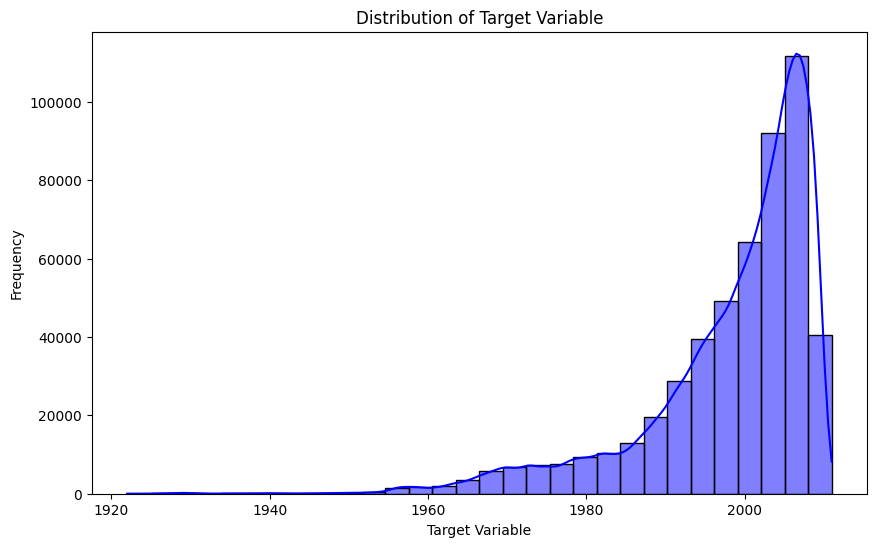

In [65]:
# Visualisasi distribusi target variabel
plt.figure(figsize=(10, 6))
sns.histplot(df[df.columns[0]], kde=True, bins=30, color='blue')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.show()

Histogram: Plot ini menggunakan histogram untuk menggambarkan frekuensi distribusi variabel target dalam 30 bin. Setiap bar mewakili jumlah data dalam rentang nilai tertentu, dengan warna biru memberikan indikasi visual intensitas frekuensi.
Distribusi ini menunjukkan pola yang jelas, di mana terjadi peningkatan signifikan setelah tahun 1960. Hal ini tercermin dari grafik yang cenderung naik tajam hingga mencapai puncaknya di sekitar tahun 2000.

KDE Line: Garis KDE (Kernel Density Estimation) di atas histogram memberikan visualisasi probabilitas distribusi secara kontinu, memberikan gambaran pola yang lebih halus dan terperinci dibandingkan histogram saja.

Insight: Dari visualisasi ini, dapat disimpulkan bahwa variabel target memiliki tren pertumbuhan yang signifikan selama periode tersebut, dengan puncaknya terjadi sekitar tahun 2000. Hal ini mungkin mencerminkan fenomena tertentu yang relevan dengan data.

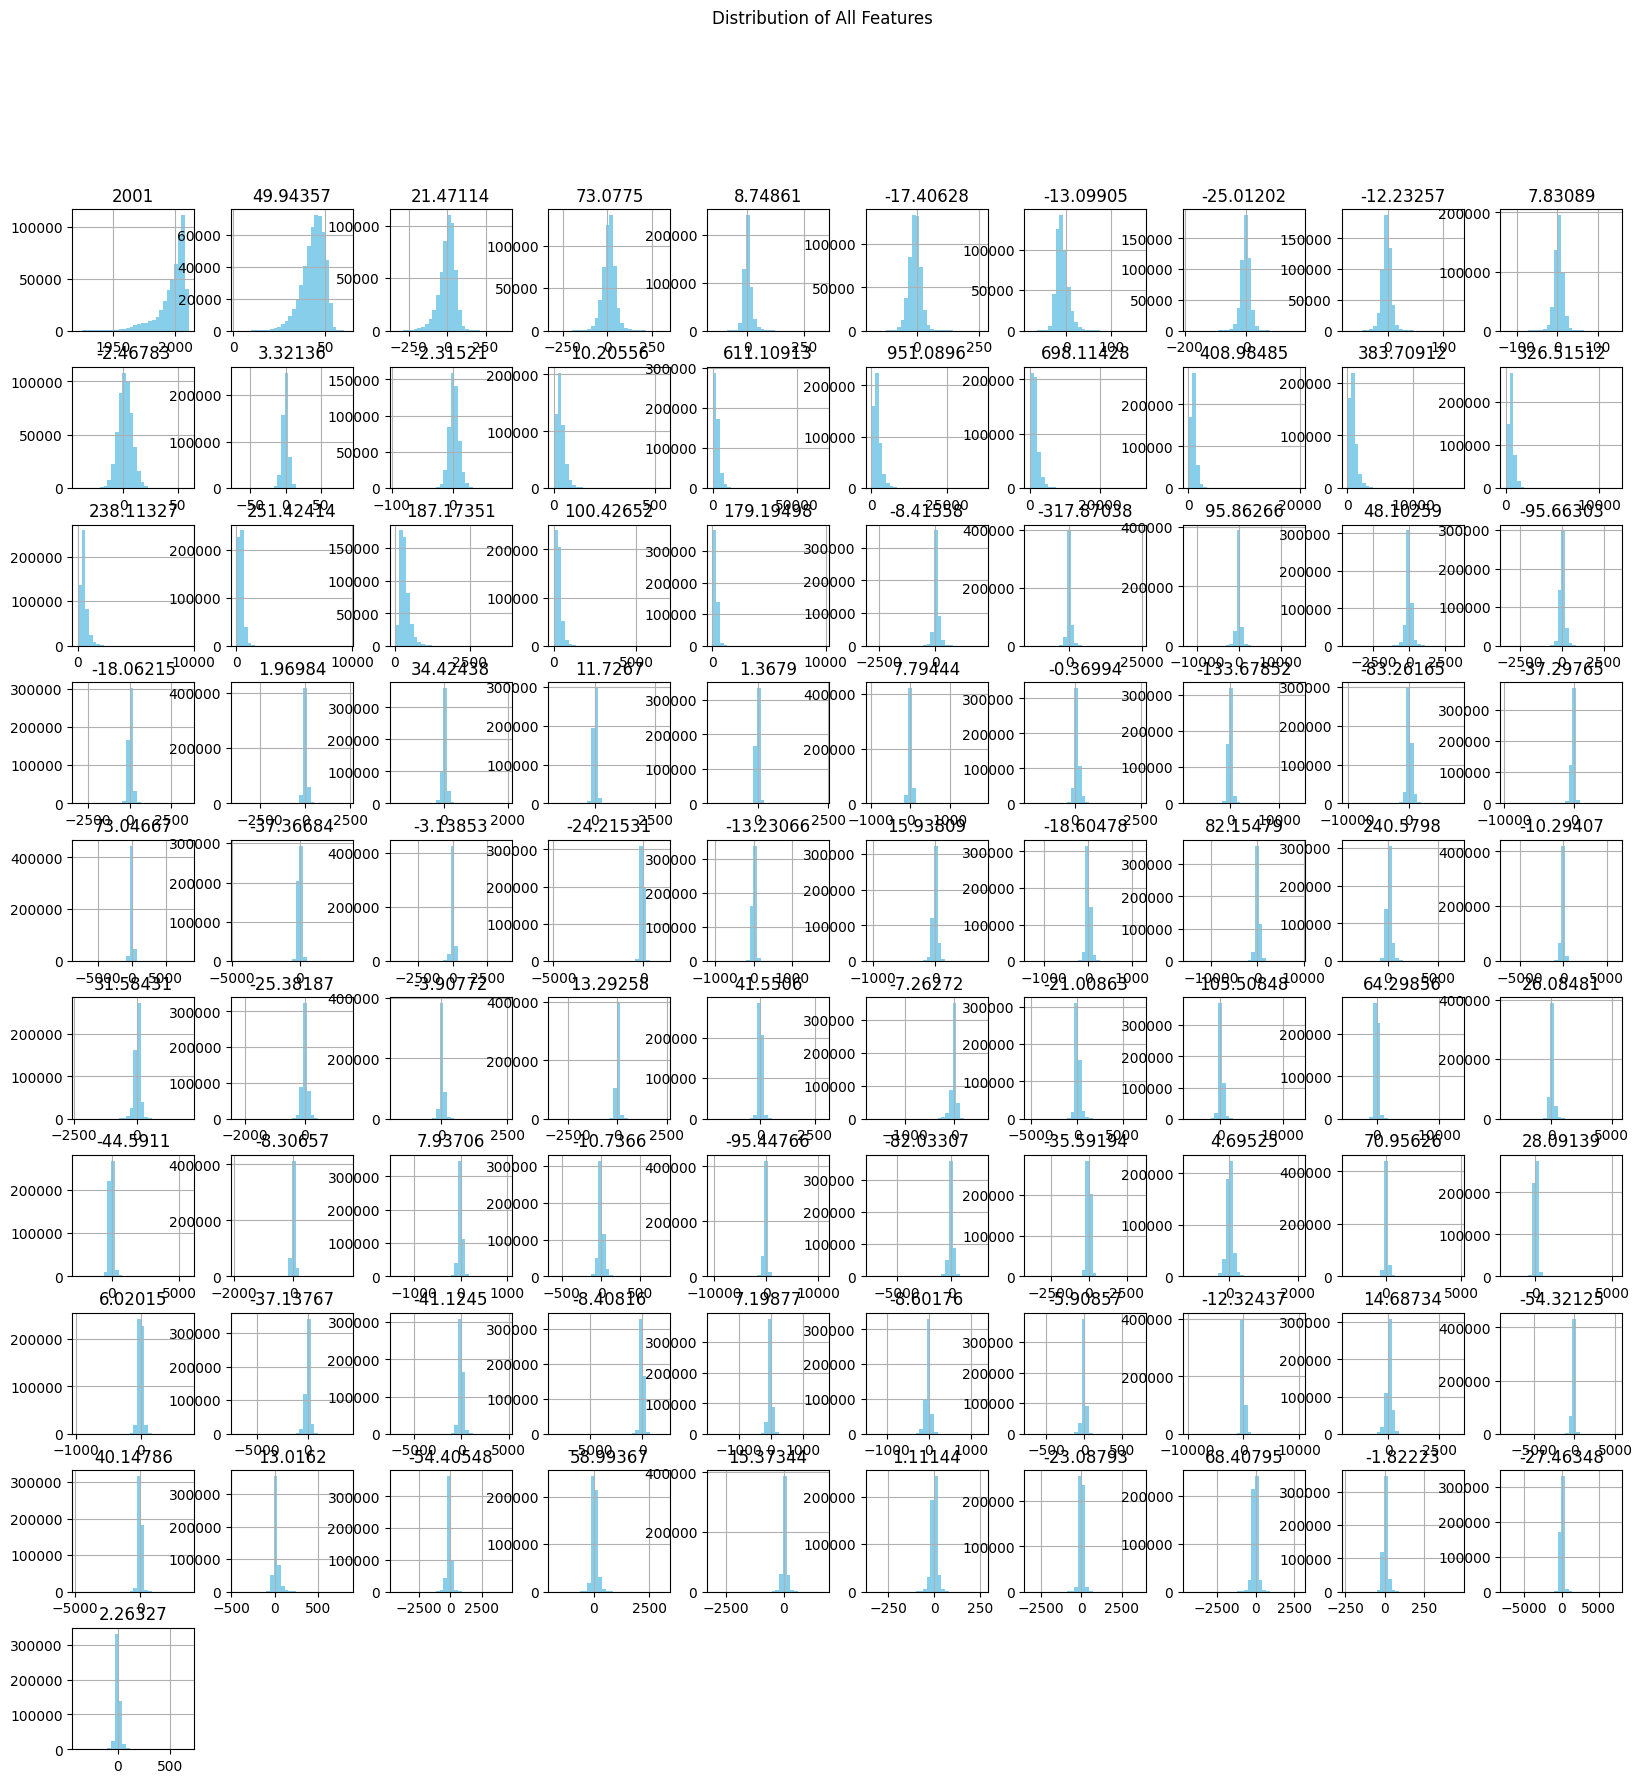

In [66]:
# Visualisasi distribusi setiap fitur
df.hist(figsize=(20, 20), bins=30, color='skyblue')
plt.suptitle('Distribution of All Features')
plt.show()

Visualisasi Histogram Semua Fitur: Grafik ini menggunakan histogram untuk menampilkan distribusi dari setiap fitur dalam dataset. Setiap subplot mewakili satu fitur, dengan histogram memberikan informasi tentang frekuensi nilai-nilai di masing-masing fitur.
Visualisasi ini memungkinkan identifikasi pola distribusi tiap fitur. Beberapa fitur menunjukkan distribusi yang terpusat, sementara lainnya memiliki rentang nilai yang lebih lebar atau distribusi yang tidak simetris.

Karakteristik Umum:

Mayoritas fitur memiliki puncak distribusi yang jelas, mengindikasikan konsentrasi data pada nilai tertentu.
Beberapa fitur tampak memiliki outlier atau distribusi yang skewed.
Insight: Visualisasi ini membantu untuk memahami pola data awal, mendeteksi outlier, dan menentukan apakah normalisasi atau transformasi diperlukan untuk analisis lebih lanjut.

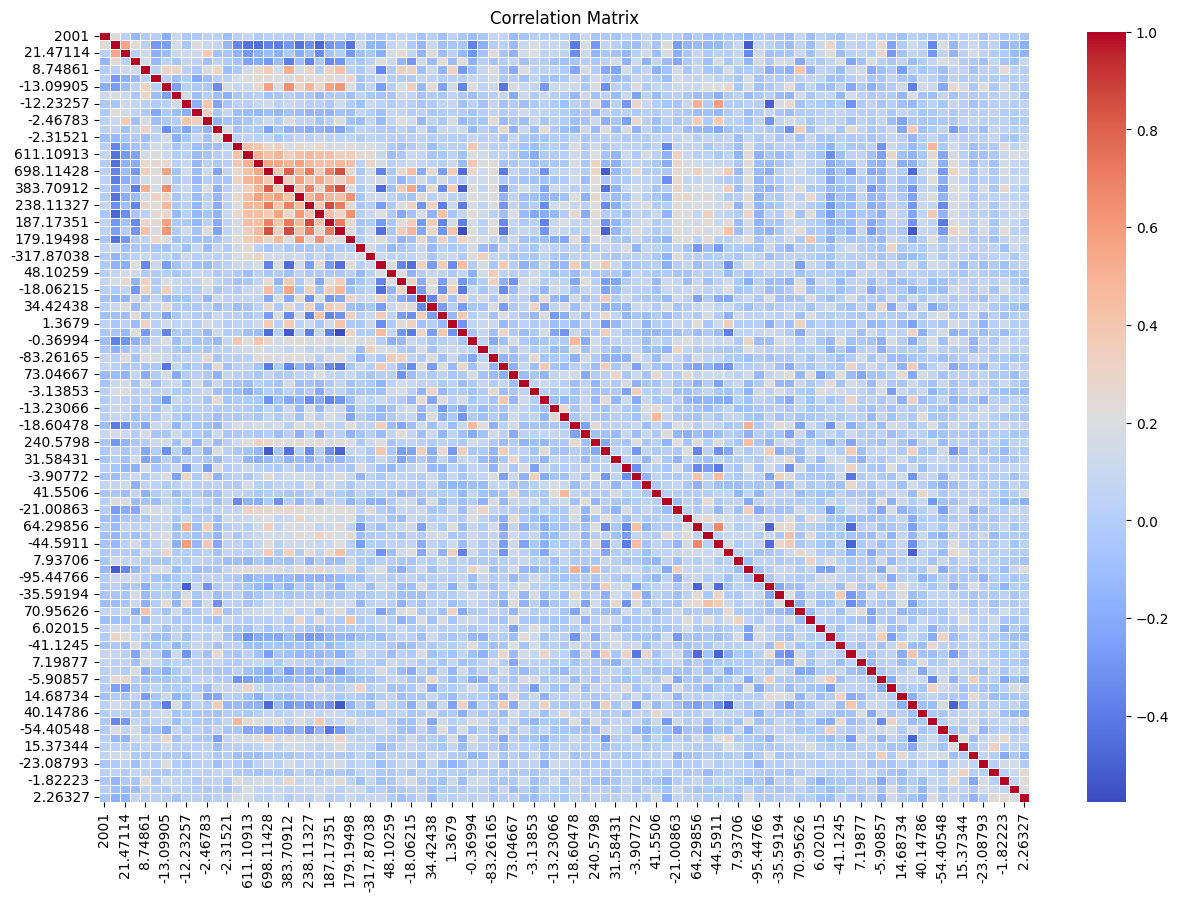

In [67]:
# Visualisasi korelasi antar fitur
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Matrix Korelasi: Grafik ini adalah heatmap yang menunjukkan korelasi antar fitur dalam dataset. Nilai korelasi berkisar antara -1 (korelasi negatif sempurna) hingga 1 (korelasi positif sempurna). Warna merah mewakili korelasi positif kuat, sedangkan warna biru menunjukkan korelasi negatif kuat.
Heatmap membantu mengidentifikasi hubungan linear antara fitur, yang penting untuk analisis lebih lanjut, seperti memilih fitur yang relevan atau menghindari multikolinearitas.

Karakteristik Data:

Banyak fitur menunjukkan korelasi rendah (warna mendekati putih/biru muda).
Beberapa fitur memiliki korelasi tinggi (warna merah), yang mungkin menunjukkan redundansi.
Insight: Visualisasi ini mempermudah pemahaman hubungan antar fitur, memungkinkan seleksi fitur yang lebih informatif, dan membantu menghindari masalah redundansi data.

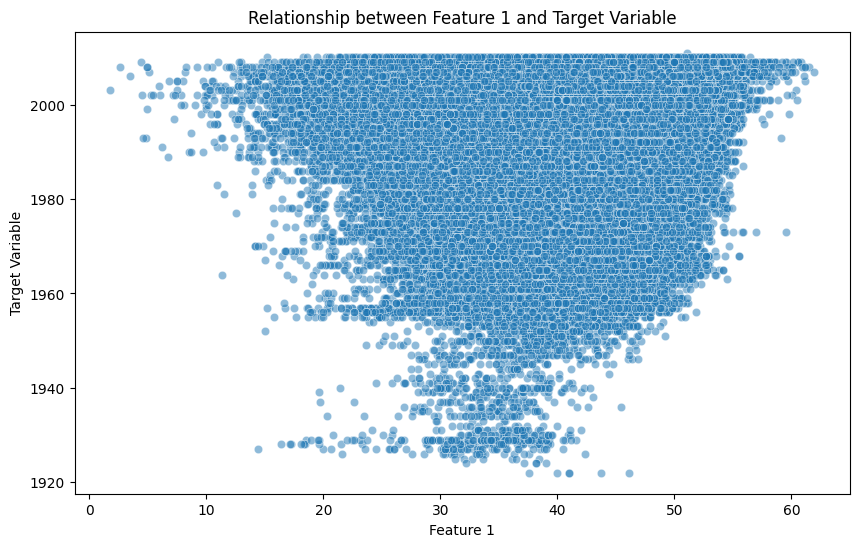

In [68]:
# Visualisasi hubungan antara fitur utama dan target
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df[df.columns[1]], y=df[df.columns[0]], alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Target Variable')
plt.title('Relationship between Feature 1 and Target Variable')
plt.show()


Scatter Plot: Visualisasi ini menampilkan hubungan antara Feature 1 (sumbu x) dan Target Variable (sumbu y). Setiap titik mewakili satu entri dalam dataset.
Grafik ini memperlihatkan pola persebaran data. Walaupun tidak terlihat hubungan linear yang jelas, terdapat pola berbentuk kerucut terbalik, menunjukkan variasi target lebih besar pada nilai Feature 1 yang rendah dan menyempit pada nilai yang tinggi.

Karakteristik Hubungan:

Tidak ada hubungan linear kuat yang langsung terlihat.
Sebagian besar data terkonsentrasi pada nilai tertentu, sedangkan nilai ekstrem lebih jarang muncul.
Insight: Scatter plot ini membantu memahami pola hubungan antar variabel dan mengidentifikasi apakah hubungan tersebut linier, non-linier, atau acak, yang dapat digunakan untuk pemodelan lebih lanjut.

In [4]:
# Menghilangkan kolom yang tidak memiliki nama (jika ada)
df.columns = [str(i) for i in range(df.shape[1])]


Kode tersebut digunakan untuk mengganti nama kolom dataset dengan nama baru berbentuk angka berurutan (indeks kolom) dalam format string. Hal ini dilakukan untuk menghindari masalah jika ada kolom tanpa nama atau dengan nama yang tidak sesuai.

df.columns: Mengakses semua nama kolom dalam dataset.
range(df.shape[1]): Menghasilkan indeks sebanyak jumlah kolom dalam dataset.
[str(i) for i in range(df.shape[1])]: Mengonversi setiap indeks kolom menjadi string, lalu menggantikan nama kolom lama dengan nama baru berbentuk string angka.
Setelah kode ini dijalankan, nama semua kolom dalam dataset akan berbentuk string angka, seperti '0', '1', '2', dan seterusnya. Hal ini bermanfaat untuk memastikan konsistensi nama kolom dalam analisis lebih lanjut.

In [5]:
# Mengatasi Missing Values
# Jika ada missing value, kita akan menggantinya dengan median dari setiap kolom
df.fillna(df.median(), inplace=True)


Kode tersebut digunakan untuk menangani missing values (nilai kosong) dalam dataset dengan menggantinya menggunakan nilai median dari masing-masing kolom. Berikut penjelasannya:

df.fillna(df.median(), inplace=True):
df.fillna(): Mengisi nilai kosong di dataset.
df.median(): Menghitung nilai median untuk setiap kolom. Median adalah nilai tengah dalam distribusi data, yang lebih tahan terhadap pengaruh outlier dibandingkan mean.
inplace=True: Memastikan pengisian nilai dilakukan langsung pada dataset asli tanpa membuat salinan.
Tujuan
Langkah ini memastikan tidak ada missing values dalam dataset, sehingga analisis atau pemodelan dapat dilakukan tanpa error yang diakibatkan oleh nilai kosong. Menggunakan median sebagai pengganti cocok untuk menghindari bias yang mungkin disebabkan oleh outlier pada data numerik.

In [6]:
# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=['0'])  # Misalkan kolom pertama adalah target
y = df['0']



Kode ini memisahkan dataset menjadi dua bagian utama: fitur (X) dan target (y). Fitur diperoleh dengan menghapus kolom '0' dari dataset menggunakan df.drop(columns=['0']), yang menganggap kolom tersebut adalah target yang akan diprediksi. Sedangkan target, yaitu kolom '0', diambil secara langsung dari dataset menggunakan df['0']. Langkah ini penting untuk mempersiapkan data dalam format yang sesuai untuk proses pelatihan model machine learning, di mana fitur digunakan untuk memprediksi target.








In [7]:
# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Kode ini melakukan standarisasi fitur untuk memastikan setiap kolom fitur memiliki skala yang sama. Standarisasi ini dilakukan menggunakan StandardScaler dari library Scikit-learn, yang mengubah setiap kolom fitur agar memiliki mean = 0 dan standard deviation = 1.

scaler = StandardScaler(): Membuat objek StandardScaler yang akan digunakan untuk melakukan standarisasi.
scaler.fit_transform(X):
fit: Menghitung mean dan standard deviation dari setiap kolom fitur pada dataset X.
transform: Menggunakan mean dan standard deviation tersebut untuk mentransformasi nilai fitur, menghasilkan data yang telah distandarisasi.
Hasil standarisasi disimpan dalam variabel X_scaled, yang siap digunakan untuk proses pelatihan model. Langkah ini penting terutama jika algoritma machine learning yang digunakan sensitif terhadap skala data, seperti k-NN atau Gradient Descent.

In [11]:

# Menggunakan PCA untuk mengurangi dimensi data
# Mengambil jumlah komponen yang menjelaskan 95% dari varians data
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)


Kode ini menggunakan PCA (Principal Component Analysis) untuk mengurangi dimensi dataset, dengan memilih jumlah komponen utama yang menjelaskan 95% dari total varians data. Berikut penjelasannya:

pca = PCA(n_components=0.95): Membuat objek PCA yang secara otomatis menentukan jumlah komponen minimum yang diperlukan untuk mempertahankan 95% varians dari data asli.
pca.fit_transform(X_scaled):
fit: Menghitung komponen utama berdasarkan data yang telah distandarisasi (X_scaled).
transform: Mengonversi data asli ke ruang baru yang direpresentasikan oleh komponen utama tersebut.
Hasilnya disimpan dalam X_pca, yaitu data dengan dimensi yang lebih kecil tetapi tetap mempertahankan sebagian besar informasi dari data asli. Langkah ini sangat berguna untuk mengurangi kompleksitas komputasi, terutama untuk dataset dengan jumlah fitur yang besar, tanpa kehilangan banyak informasi penting.

In [12]:
# Membagi dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


Kode ini membagi dataset menjadi training set (80%) dan testing set (20%) menggunakan train_test_split. Parameter random_state=42 memastikan pembagian data konsisten, dan dataset fitur (X_pca) serta target (y) dibagi menjadi X_train, X_test, y_train, y_test untuk proses pelatihan dan evaluasi model.

In [13]:
# Informasi hasil PCA
print(f"Jumlah fitur setelah PCA: {X_pca.shape[1]}")


Jumlah fitur setelah PCA: 67


Kode ini mencetak jumlah fitur yang tersisa setelah proses PCA. Dengan menggunakan X_pca.shape[1], kode mengambil jumlah kolom dari dataset yang telah direduksi dimensinya oleh PCA, yang menunjukkan berapa banyak komponen utama yang dipertahankan. Informasi ini membantu memastikan bahwa dimensi dataset telah berhasil dikurangi sesuai dengan target varians (95%).


Output Jumlah fitur setelah PCA: 67 menunjukkan bahwa setelah proses PCA, dataset direduksi dari jumlah fitur awal menjadi 67 fitur utama. Hal ini berarti 67 komponen utama tersebut cukup untuk menjelaskan 95% varians data, sesuai dengan parameter yang diberikan pada PCA. Reduksi ini membantu mengurangi kompleksitas komputasi tanpa kehilangan banyak informasi penting.

In [14]:
# Hasilkan informasi ukuran dataset
print(f"Ukuran training set: {X_train.shape}")
print(f"Ukuran testing set: {X_test.shape}")



Ukuran training set: (412275, 67)
Ukuran testing set: (103069, 67)



Output Ukuran training set: (412275, 67) dan Ukuran testing set: (103069, 67) menunjukkan bahwa dataset telah dibagi menjadi 412,275 sampel untuk training dan 103,069 sampel untuk testing, dengan setiap sampel memiliki 67 fitur (hasil reduksi PCA). Proporsi ini sesuai dengan pengaturan test_size=0.2, di mana 80% data digunakan untuk pelatihan dan 20% untuk pengujian. Ukuran ini memastikan dataset cukup besar untuk membangun dan menguji model dengan baik.

In [15]:
# ------------------------Membuat dan melatih model Decision Tree Regressor---------------------------------
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)


Kode ini membuat dan melatih model Decision Tree Regressor dengan menggunakan data pelatihan. Berikut penjelasannya:

DecisionTreeRegressor(random_state=42):

Membuat objek Decision Tree Regressor dengan random_state=42 untuk memastikan hasilnya konsisten setiap kali kode dijalankan.
dt_regressor.fit(X_train, y_train):

Melatih model menggunakan data pelatihan (X_train untuk fitur dan y_train untuk target).
Model akan membangun pohon keputusan berdasarkan hubungan antara fitur dan target untuk memprediksi nilai target.
Hasil akhirnya adalah model Decision Tree Regressor yang siap digunakan untuk prediksi pada data pengujian atau data baru. random_state digunakan untuk menjaga reproducibility model.

In [17]:
# Melakukan prediksi pada testing set
y_pred = dt_regressor.predict(X_test)

Kode ini menggunakan model Decision Tree Regressor untuk memprediksi nilai target pada data testing (X_test). Hasil prediksi disimpan dalam y_pred dan dapat digunakan untuk mengevaluasi performa model terhadap data aktual (y_test).








In [18]:
# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 197.44812698289496
Mean Absolute Error: 9.685676585588295
R-squared: -0.6635976085395336


Kode ini mengevaluasi performa model menggunakan tiga metrik evaluasi:

Mean Squared Error (MSE): Mengukur rata-rata kuadrat kesalahan prediksi. Nilai lebih kecil menunjukkan performa model yang lebih baik.
Mean Absolute Error (MAE): Mengukur rata-rata kesalahan absolut antara nilai prediksi dan nilai sebenarnya.
R-squared (R²): Mengukur proporsi variansi data target yang dapat dijelaskan oleh model. Nilai mendekati 1 menunjukkan model yang baik, sedangkan nilai negatif menunjukkan model buruk.

Output:

Mean Squared Error: 197.4481 (kesalahan rata-rata cukup besar).
Mean Absolute Error: 9.6857 (kesalahan absolut rata-rata).
R-squared: -0.6636 (model tidak cocok dengan data, bahkan lebih buruk dibandingkan garis rata-rata).
Kesimpulan: Model perlu perbaikan, mungkin melalui hyperparameter tuning atau pemilihan fitur yang lebih relevan.

In [19]:
# Hyperparameter Tuning menggunakan GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)


Kode ini melakukan hyperparameter tuning pada Decision Tree Regressor menggunakan GridSearchCV untuk menemukan kombinasi parameter terbaik.

Parameter Dicoba:

max_depth: Membatasi kedalaman maksimum pohon (None, 10, 20, 30).
min_samples_split: Jumlah minimum sampel untuk membagi node (2, 5, 10).
min_samples_leaf: Jumlah minimum sampel pada setiap daun (1, 2, 4).
GridSearchCV:

Menggunakan cross-validation (cv=3) untuk mengevaluasi kombinasi parameter.
n_jobs=-1: Memanfaatkan semua prosesor untuk mempercepat pencarian.
verbose=2: Memberikan log proses tuning.
Hasil:

Kombinasi terbaik ditemukan: max_depth=10, min_samples_leaf=4, dan min_samples_split=10.
Insight: Kombinasi ini dapat meningkatkan performa model dibandingkan konfigurasi default dengan lebih baik menangkap pola data tanpa overfitting.

In [20]:
# Menampilkan hasil hyperparameter terbaik
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}



Kode ini digunakan untuk menampilkan kombinasi hyperparameter terbaik yang ditemukan oleh GridSearchCV. 

Hasilnya menunjukkan bahwa model optimal memiliki parameter max_depth=10, min_samples_leaf=4, dan min_samples_split=10. Kombinasi ini dirancang untuk mengontrol kompleksitas model, mencegah overfitting, dan meningkatkan generalisasi model pada data baru.

In [21]:
# Evaluasi model dengan hyperparameter terbaik
y_pred_best = grid_search.best_estimator_.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Mean Squared Error (Best Model): {mse_best}")
print(f"Mean Absolute Error (Best Model): {mae_best}")
print(f"R-squared (Best Model): {r2_best}")


Mean Squared Error (Best Model): 103.47772784093773
Mean Absolute Error (Best Model): 7.341307635674987
R-squared (Best Model): 0.1281492349218295


Kode ini mengevaluasi performa model Decision Tree Regressor dengan hyperparameter terbaik yang telah ditentukan melalui GridSearchCV. Model optimal digunakan untuk memprediksi data testing (X_test), dan hasil prediksi dievaluasi dengan tiga metrik:

Mean Squared Error (MSE): Sebesar 103.4777, menunjukkan penurunan kesalahan rata-rata kuadrat dibandingkan model awal.

Mean Absolute Error (MAE): Sebesar 7.3413, mengindikasikan rata-rata kesalahan absolut yang lebih kecil.

R-squared (R²): Sebesar 0.1281, menunjukkan bahwa model hanya mampu menjelaskan 12.81% variansi target, yang lebih baik dari model awal tetapi masih belum optimal.

Evaluasi ini menunjukkan peningkatan performa setelah tuning hyperparameter, meskipun model masih memerlukan perbaikan lebih lanjut untuk mencapai hasil yang lebih memuaskan.

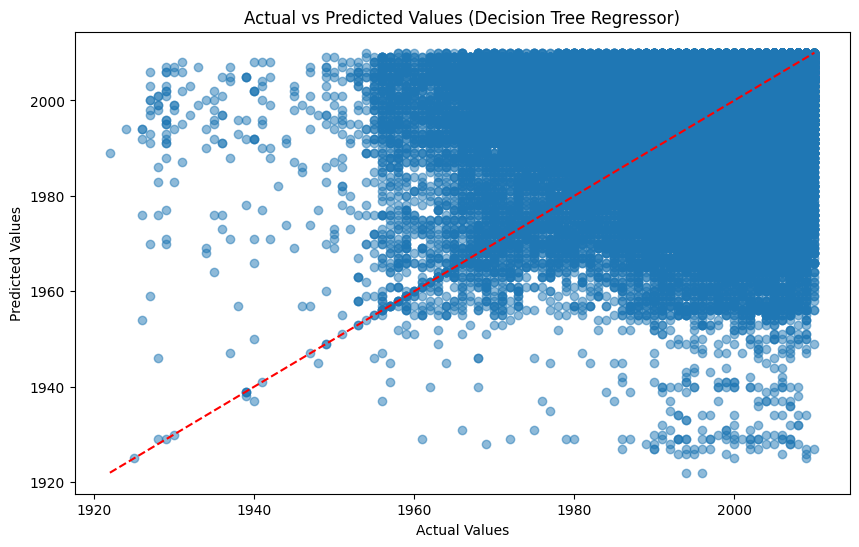

In [22]:
# Visualisasi hasil prediksi vs nilai sebenarnya
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Decision Tree Regressor)')
plt.show()


Grafik ini adalah scatter plot yang membandingkan nilai aktual (sumbu x) dengan nilai prediksi (sumbu y) dari model Decision Tree Regressor. Garis merah putus-putus menunjukkan garis referensi di mana nilai prediksi sama dengan nilai aktual (prediksi sempurna).

Penjelasan:
Distribusi Titik: Banyak titik menyebar di sekitar garis diagonal, tetapi terdapat penyimpangan yang signifikan, terutama untuk nilai aktual yang lebih rendah.
Kinerja Model: Penyebaran yang jauh dari garis diagonal mengindikasikan bahwa model masih memiliki kesalahan prediksi yang cukup besar, terutama untuk nilai tertentu.

Insight:
Grafik ini menunjukkan bahwa meskipun tuning hyperparameter telah dilakukan, model belum sepenuhnya optimal dalam memprediksi nilai target, yang mungkin memerlukan perbaikan tambahan pada data atau arsitektur model.

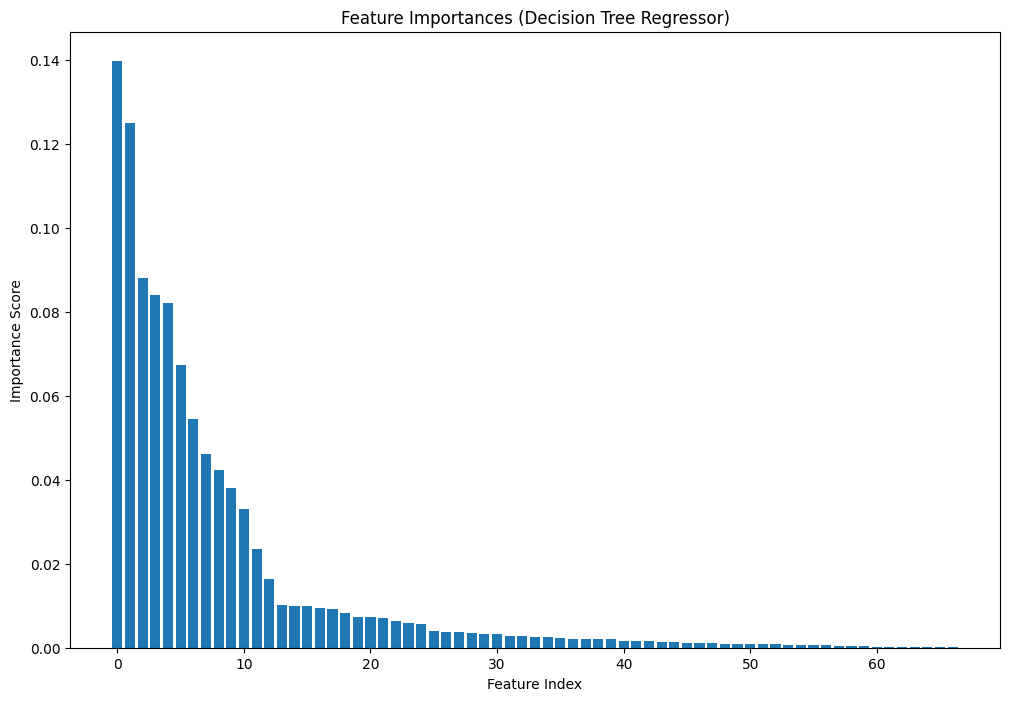

In [23]:
# Visualisasi pentingnya fitur (Feature Importance)
plt.figure(figsize=(12, 8))
feature_importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(feature_importances)[::-1]
plt.bar(range(X_pca.shape[1]), feature_importances[indices], align='center')
plt.xlabel('Feature Index')
plt.ylabel('Importance Score')
plt.title('Feature Importances (Decision Tree Regressor)')
plt.show()


Grafik ini menunjukkan Feature Importances pada model Decision Tree Regressor, menggambarkan kontribusi masing-masing fitur terhadap prediksi model.

Penjelasan:
Sumbu X: Indeks fitur dalam dataset.
Sumbu Y: Skor pentingnya fitur, dengan nilai yang lebih tinggi menunjukkan fitur yang lebih berpengaruh.
Distribusi: Beberapa fitur memiliki skor penting yang signifikan (di sebelah kiri), sedangkan sebagian besar fitur lainnya memiliki skor yang mendekati nol, menunjukkan pengaruh yang rendah atau tidak signifikan.

Insight:
Grafik ini membantu mengidentifikasi fitur yang paling berpengaruh, yang dapat digunakan untuk seleksi fitur. Fitur dengan skor rendah dapat dipertimbangkan untuk dihapus guna menyederhanakan model tanpa mengurangi performa secara signifikan.

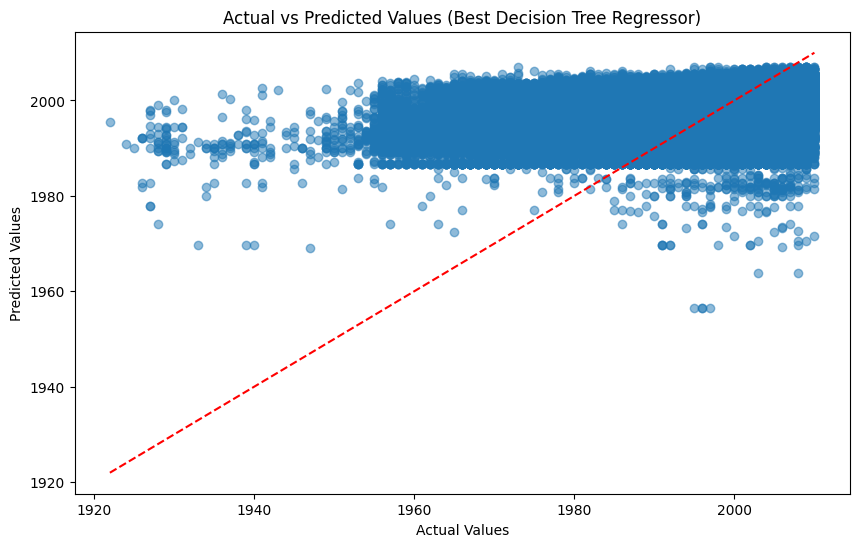

In [24]:
# Visualisasi hasil prediksi vs nilai sebenarnya untuk model terbaik
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Best Decision Tree Regressor)')
plt.show()



Grafik ini menampilkan hubungan antara nilai aktual (sumbu x) dan nilai prediksi (sumbu y) menggunakan Decision Tree Regressor terbaik setelah tuning hyperparameter.

Penjelasan:
Garis Merah Putus-putus: Representasi ideal di mana nilai prediksi sama dengan nilai aktual (prediksi sempurna).
Penyebaran Titik: Sebagian besar titik masih menyebar jauh dari garis ideal, menunjukkan bahwa model belum sepenuhnya akurat dalam memprediksi nilai target.
Perbaikan: Dibandingkan model awal, prediksi lebih terkonsentrasi, namun masih ada kelemahan untuk data di luar pola utama.

Insight:
Model dengan hyperparameter terbaik menunjukkan sedikit peningkatan akurasi dibandingkan model awal, tetapi masih memiliki penyimpangan yang signifikan, mengindikasikan perlunya optimasi lebih lanjut atau pendekatan model lain.

In [25]:
#-----------------------------------------Membuat dan melatih model K-Neighbors Regressor-------------------------------
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)


KNeighborsRegressor()

Kode ini membuat dan melatih model K-Neighbors Regressor menggunakan dataset training (X_train, y_train).

Penjelasan:
KNeighborsRegressor(): Membuat model regresi berbasis algoritma K-Nearest Neighbors (KNN), yang memprediksi nilai target berdasarkan rata-rata nilai target dari tetangga terdekatnya.
.fit(X_train, y_train): Melatih model dengan data training, sehingga model mempelajari pola hubungan antara fitur (X) dan target (y).

Insight:
Model ini cocok untuk regresi sederhana dan data dengan distribusi lokal, tetapi sensitif terhadap parameter jumlah tetangga (k) yang perlu dioptimalkan melalui hyperparameter tuning untuk hasil terbaik.

In [26]:
# Melakukan prediksi pada testing set dengan K-Neighbors Regressor
y_pred_knn = knn_regressor.predict(X_test)


Kode ini menggunakan model K-Neighbors Regressor yang telah dilatih untuk memprediksi nilai target pada data testing (X_test). Prediksi yang dihasilkan disimpan dalam variabel y_pred_knn.

Penjelasan:
predict(X_test): Menghasilkan nilai target berdasarkan rata-rata nilai target dari tetangga terdekat untuk setiap data pada testing set.
y_pred_knn: Berisi hasil prediksi model untuk digunakan dalam evaluasi performa.

Insight:
Langkah ini memungkinkan evaluasi model KNN pada data yang belum terlihat sebelumnya, untuk menilai akurasi dan kesesuaian model dalam memprediksi nilai target.

In [27]:
# Evaluasi model K-Neighbors Regressor
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"Mean Squared Error (KNN): {mse_knn}")
print(f"Mean Absolute Error (KNN): {mae_knn}")
print(f"R-squared (KNN): {r2_knn}")

Mean Squared Error (KNN): 92.91811466105229
Mean Absolute Error (KNN): 6.875846277736275
R-squared (KNN): 0.21711917098347566



Kode ini mengevaluasi performa model K-Neighbors Regressor menggunakan tiga metrik utama:

Mean Squared Error (MSE): Mengukur rata-rata kuadrat kesalahan prediksi. Nilai MSE yang lebih kecil menunjukkan model lebih baik.
Hasil: 92.9181.

Mean Absolute Error (MAE): Mengukur rata-rata kesalahan absolut antara prediksi dan nilai aktual. Nilai yang lebih rendah lebih baik.
Hasil: 6.8758.

R-squared (R²): Menunjukkan proporsi variansi dalam target yang dapat dijelaskan oleh model. Nilai mendekati 1 menunjukkan model yang baik.
Hasil: 0.2171.

Insight:
Model K-Neighbors Regressor menunjukkan hasil evaluasi yang lebih baik dibandingkan model Decision Tree Regressor sebelumnya, terutama pada MSE dan R², tetapi masih jauh dari performa ideal, yang mengindikasikan perlu optimasi lebih lanjut.

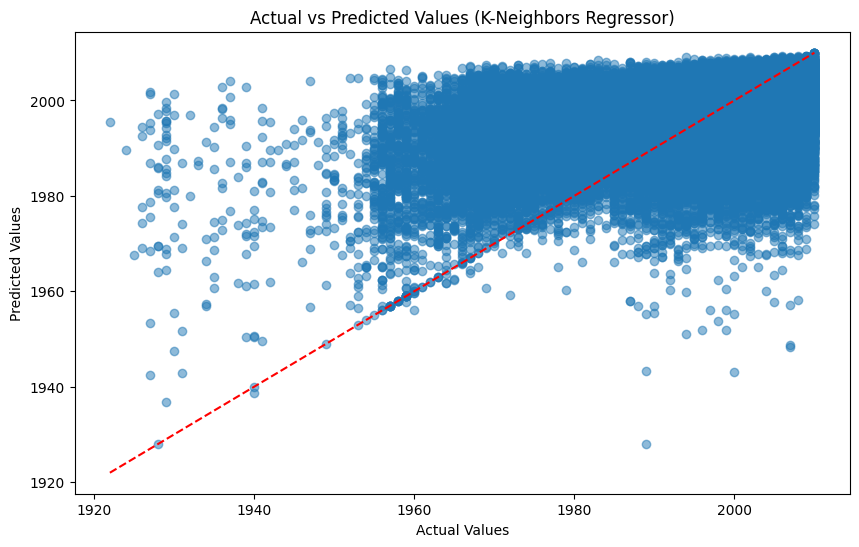

In [28]:
# Visualisasi hasil prediksi vs nilai sebenarnya untuk K-Neighbors Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (K-Neighbors Regressor)')
plt.show()

Grafik ini menampilkan hubungan antara nilai aktual (sumbu x) dan nilai prediksi (sumbu y) yang dihasilkan oleh K-Neighbors Regressor.

Penjelasan:
Garis Merah Putus-putus: Garis referensi di mana nilai prediksi sama dengan nilai aktual (prediksi sempurna).
Penyebaran Titik: Sebagian besar titik masih menyebar jauh dari garis referensi, meskipun ada kecenderungan beberapa prediksi mendekati garis tersebut.

Insight:
Model K-Neighbors Regressor menunjukkan perbaikan dibandingkan beberapa model sebelumnya, dengan prediksi yang sedikit lebih dekat ke nilai aktual. Namun, penyebaran yang signifikan menunjukkan bahwa model belum menangkap pola data secara optimal dan masih memerlukan tuning atau pendekatan lain.

In [33]:
# Hyperparameter Tuning menggunakan GridSearchCV untuk K-Neighbors Regressor
param_grid_knn = {
    'n_neighbors': [1, 2, 3],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search_knn = GridSearchCV(estimator=knn_regressor, param_grid=param_grid_knn, cv=2, n_jobs=-1, verbose=2)
grid_search_knn.fit(X_train, y_train)


Fitting 2 folds for each of 12 candidates, totalling 24 fits


c:\Users\figoh\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=2, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=2)

Kode ini melakukan hyperparameter tuning pada model K-Neighbors Regressor menggunakan GridSearchCV untuk mencari kombinasi parameter terbaik.

Penjelasan:
Parameter Dicoba:

n_neighbors: Jumlah tetangga yang dipertimbangkan (1, 2, 3).
weights: Bobot untuk tetangga, bisa 'uniform' (semua bobot sama) atau 'distance' (berdasarkan jarak).
p: Parameter jarak, 1 untuk Manhattan distance, 2 untuk Euclidean distance.
GridSearchCV:

Menguji berbagai kombinasi parameter menggunakan cross-validation (cv=2) dan menemukan model terbaik berdasarkan performa.
n_jobs=-1: Memanfaatkan semua prosesor untuk mempercepat pencarian.
Hasil:

Model terbaik ditemukan dengan parameter:
n_neighbors=3
weights='distance'
Kombinasi ini memberikan bobot lebih besar pada tetangga yang lebih dekat, meningkatkan akurasi prediksi.
Insight:
Hasil tuning ini menunjukkan bahwa dengan menggunakan 3 tetangga terdekat dan bobot berdasarkan jarak, model diharapkan memiliki performa yang lebih baik dalam menangkap pola data. Model ini siap digunakan untuk evaluasi lebih lanjut.

In [34]:
# Menampilkan hasil hyperparameter terbaik untuk K-Neighbors Regressor
print(f"Best Parameters (KNN): {grid_search_knn.best_params_}")

Best Parameters (KNN): {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}



Kode ini digunakan untuk menampilkan kombinasi hyperparameter terbaik yang ditemukan oleh GridSearchCV untuk K-Neighbors Regressor.

Penjelasan:

grid_search_knn.best_params_: Mengembalikan kombinasi parameter optimal berdasarkan evaluasi GridSearchCV.
Output:

Best Parameters (KNN): {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Hasil:

n_neighbors=3: Menggunakan 3 tetangga terdekat.
p=2: Menggunakan Euclidean distance untuk menghitung jarak.
weights='distance': Memberikan bobot lebih besar pada tetangga yang lebih dekat.
Insight: Kombinasi parameter ini memungkinkan model untuk memberikan prediksi yang lebih akurat dengan memperhitungkan jarak tetangga dalam estimasi nilai target.

In [35]:
# Evaluasi model K-Neighbors dengan hyperparameter terbaik
y_pred_best_knn = grid_search_knn.best_estimator_.predict(X_test)

mse_best_knn = mean_squared_error(y_test, y_pred_best_knn)
mae_best_knn = mean_absolute_error(y_test, y_pred_best_knn)
r2_best_knn = r2_score(y_test, y_pred_best_knn)

print(f"Mean Squared Error (Best KNN Model): {mse_best_knn}")
print(f"Mean Absolute Error (Best KNN Model): {mae_best_knn}")
print(f"R-squared (Best KNN Model): {r2_best_knn}")

Mean Squared Error (Best KNN Model): 97.47515836611186
Mean Absolute Error (Best KNN Model): 6.8552358083332905
R-squared (Best KNN Model): 0.1787238358360118


Kode ini mengevaluasi performa model K-Neighbors Regressor dengan hyperparameter terbaik yang diperoleh melalui GridSearchCV. Model tersebut digunakan untuk memprediksi nilai target pada data testing (X_test), dan hasilnya dievaluasi menggunakan tiga metrik utama:

Mean Squared Error (MSE):

Mengukur rata-rata kuadrat kesalahan prediksi.
Hasil: 97.4752 (kesalahan lebih kecil dibandingkan model KNN tanpa tuning).
Mean Absolute Error (MAE):

Mengukur rata-rata kesalahan absolut antara nilai prediksi dan aktual.
Hasil: 6.8552.
R-squared (R²):

Mengukur proporsi variansi data yang dijelaskan oleh model.
Hasil: 0.1787 (model mampu menjelaskan ~17.87% variansi target, lebih baik dibandingkan versi awal).
Insight:
Hyperparameter tuning memberikan sedikit peningkatan performa pada model K-Neighbors Regressor, menghasilkan prediksi yang lebih baik dibandingkan model default, meskipun R² masih relatif rendah, menunjukkan ada ruang untuk perbaikan lebih lanjut.

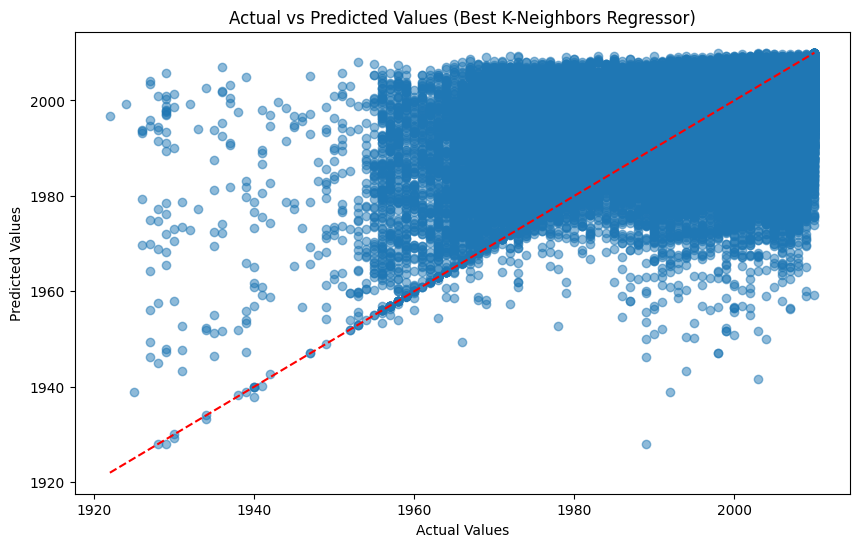

In [36]:
# Visualisasi hasil prediksi vs nilai sebenarnya untuk model terbaik K-Neighbors
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_knn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Best K-Neighbors Regressor)')
plt.show()


Grafik ini menampilkan hubungan antara nilai aktual (sumbu x) dan nilai prediksi (sumbu y) dari model K-Neighbors Regressor dengan hyperparameter terbaik.

Penjelasan:
Garis Merah Putus-putus: Representasi ideal di mana nilai prediksi sama dengan nilai aktual (prediksi sempurna).
Penyebaran Titik: Titik-titik lebih terkonsentrasi mendekati garis ideal dibandingkan model sebelumnya, meskipun masih terdapat banyak penyimpangan terutama pada nilai aktual yang lebih tinggi.

Insight:
Model dengan hyperparameter terbaik menunjukkan sedikit perbaikan dalam presisi prediksi dibandingkan model sebelumnya. Namun, penyebaran yang signifikan menunjukkan bahwa model belum mampu menangkap semua pola dalam data dengan baik, terutama untuk nilai tertentu. Model ini masih dapat ditingkatkan melalui pendekatan lain atau kombinasi model.

In [ ]:
#--------------------------Membuat dan melatih model XGBoost Regressor----------------------------
xgb_regressor = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

Kode ini membuat dan melatih model XGBoost Regressor untuk memprediksi nilai target menggunakan dataset training (X_train, y_train).

Penjelasan:
XGBRegressor:

Digunakan untuk masalah regresi dengan algoritma XGBoost (Extreme Gradient Boosting).
objective='reg:squarederror': Menggunakan fungsi loss mean squared error untuk melatih model.
random_state=42: Menetapkan seed untuk hasil yang konsisten.
.fit(X_train, y_train):

Melatih model pada dataset training untuk mempelajari hubungan antara fitur dan target.
Insight:
XGBoost adalah model yang kuat untuk menangkap pola kompleks dan menangani dataset dengan fitur yang banyak. Model ini sering menghasilkan performa yang baik pada masalah regresi setelah tuning hyperparameter. Evaluasi dan tuning selanjutnya diperlukan untuk memaksimalkan kemampuan model ini.

In [38]:
# Melakukan prediksi pada testing set dengan XGBoost Regressor
y_pred_xgb = xgb_regressor.predict(X_test)

Kode ini menggunakan model XGBoost Regressor yang telah dilatih untuk memprediksi nilai target pada data testing (X_test). Hasil prediksi disimpan dalam variabel y_pred_xgb.

Penjelasan:
predict(X_test): Menghasilkan prediksi nilai target untuk setiap sampel pada testing set.
y_pred_xgb: Berisi hasil prediksi dari model XGBoost Regressor.

Insight:
Prediksi ini akan digunakan untuk mengevaluasi performa model pada data yang tidak terlihat selama pelatihan. Langkah berikutnya adalah menghitung metrik evaluasi seperti MSE, MAE, dan R-squared untuk menilai akurasi prediksi.

In [39]:
# Evaluasi model XGBoost Regressor
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Mean Squared Error (XGBoost): {mse_xgb}")
print(f"Mean Absolute Error (XGBoost): {mae_xgb}")
print(f"R-squared (XGBoost): {r2_xgb}")

Mean Squared Error (XGBoost): 86.93034790751314
Mean Absolute Error (XGBoost): 6.682286256137044
R-squared (XGBoost): 0.26756900548934937


Kode ini mengevaluasi performa model XGBoost Regressor dengan tiga metrik utama:

Mean Squared Error (MSE):
Mengukur rata-rata kuadrat kesalahan prediksi.
Hasil: 86.9303 (kesalahan rata-rata lebih kecil dibandingkan model sebelumnya).

Mean Absolute Error (MAE):
Mengukur rata-rata kesalahan absolut antara nilai prediksi dan aktual.
Hasil: 6.6823.

R-squared (R²):
Mengukur proporsi variansi data target yang dijelaskan oleh model.
Hasil: 0.2676 (model menjelaskan sekitar 26.76% variansi target).

Insight:
Model XGBoost Regressor menunjukkan peningkatan performa dibandingkan model sebelumnya (Decision Tree dan KNN), dengan MSE dan MAE yang lebih rendah serta R² yang lebih tinggi. Namun, performa ini masih dapat ditingkatkan lebih lanjut melalui hyperparameter tuning.

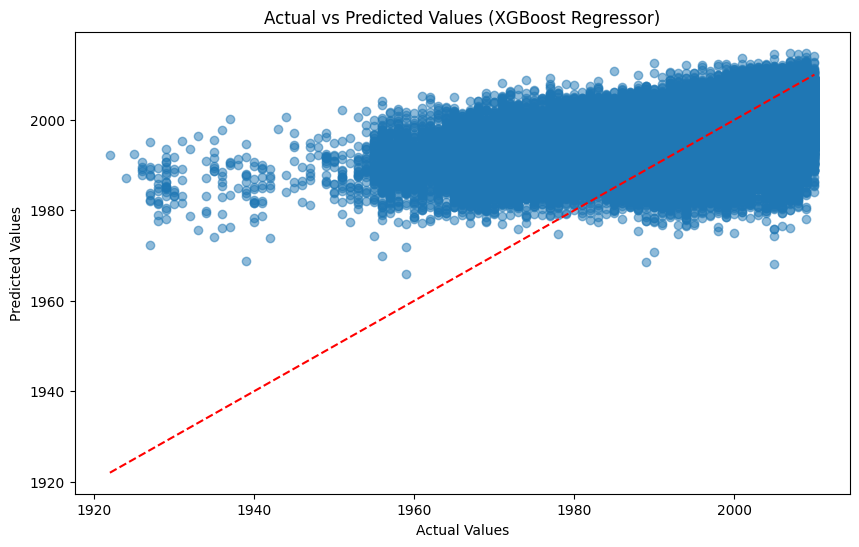

In [40]:
# Visualisasi hasil prediksi vs nilai sebenarnya untuk XGBoost Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (XGBoost Regressor)')
plt.show()


Grafik ini menunjukkan hubungan antara nilai aktual (sumbu x) dan nilai prediksi (sumbu y) dari model XGBoost Regressor.

Penjelasan:
Garis Merah Putus-putus: Garis referensi ideal di mana nilai prediksi sama dengan nilai aktual (prediksi sempurna).
Penyebaran Titik: Titik-titik lebih terkonsentrasi mendekati garis diagonal dibandingkan model sebelumnya, menunjukkan peningkatan akurasi prediksi.
Insight:
Model XGBoost Regressor memiliki performa lebih baik dibandingkan model sebelumnya, dengan distribusi prediksi yang lebih dekat ke nilai aktual. Namun, masih terdapat penyebaran untuk beberapa nilai, menunjukkan bahwa model dapat dioptimalkan lebih lanjut untuk menangkap pola data secara lebih akurat.

In [41]:
# Hyperparameter Tuning menggunakan GridSearchCV untuk XGBoost Regressor
param_grid_xgb = {
    'n_estimators': [50, 100],
    'max_depth': [2, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search_xgb = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid_xgb, cv=2, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train, y_train)


Fitting 2 folds for each of 18 candidates, totalling 36 fits


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [2, 4, 5], 'n_estimators': [50, 100]},
             verbose=2)

Kode ini melakukan hyperparameter tuning untuk XGBoost Regressor menggunakan GridSearchCV, bertujuan untuk menemukan kombinasi parameter terbaik yang meningkatkan performa model.

Penjelasan:
Parameter Dicoba:

n_estimators: Jumlah pohon dalam model (50, 100).
max_depth: Kedalaman maksimum pohon (2, 4, 5).
learning_rate: Kecepatan pembelajaran model (0.01, 0.1, 0.2).
GridSearchCV:

cv=2: Melakukan validasi silang dengan 2 lipatan untuk setiap kombinasi parameter.
n_jobs=-1: Memanfaatkan semua prosesor untuk mempercepat pencarian.
verbose=2: Memberikan log detail selama proses tuning.
Hasil:

Model terbaik ditemukan dengan kombinasi hyperparameter tertentu yang ditampilkan sebagai best_estimator.

Insight:
Proses tuning ini bertujuan untuk mengoptimalkan performa model dengan menyesuaikan jumlah pohon, kedalaman pohon, dan laju pembelajaran. Langkah ini penting untuk memastikan model tidak overfitting atau underfitting pada data. Model yang dihasilkan siap untuk evaluasi lebih lanjut.

In [42]:
# Menampilkan hasil hyperparameter terbaik untuk XGBoost Regressor
print(f"Best Parameters (XGBoost): {grid_search_xgb.best_params_}")

Best Parameters (XGBoost): {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}



Kode ini menampilkan hasil hyperparameter terbaik untuk XGBoost Regressor, yaitu:

learning_rate=0.2, max_depth=5, n_estimators=100.
Kombinasi ini memberikan model yang lebih akurat dan seimbang antara kompleksitas dan generalisasi.

In [43]:
# Evaluasi model XGBoost dengan hyperparameter terbaik
y_pred_best_xgb = grid_search_xgb.best_estimator_.predict(X_test)

mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
mae_best_xgb = mean_absolute_error(y_test, y_pred_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

print(f"Mean Squared Error (Best XGBoost Model): {mse_best_xgb}")
print(f"Mean Absolute Error (Best XGBoost Model): {mae_best_xgb}")
print(f"R-squared (Best XGBoost Model): {r2_best_xgb}")


Mean Squared Error (Best XGBoost Model): 87.70932060170699
Mean Absolute Error (Best XGBoost Model): 6.699825736809201
R-squared (Best XGBoost Model): 0.2610057592391968


Kode ini mengevaluasi performa XGBoost Regressor dengan hyperparameter terbaik menggunakan tiga metrik:

MSE: 87.7093 (kesalahan rata-rata lebih rendah).
MAE: 6.6998 (kesalahan absolut rata-rata kecil).
R²: 0.2610 (model menjelaskan ~26.10% variansi target).
Insight: Model dengan tuning memberikan hasil yang sedikit lebih baik dibandingkan sebelumnya, menunjukkan peningkatan prediksi.

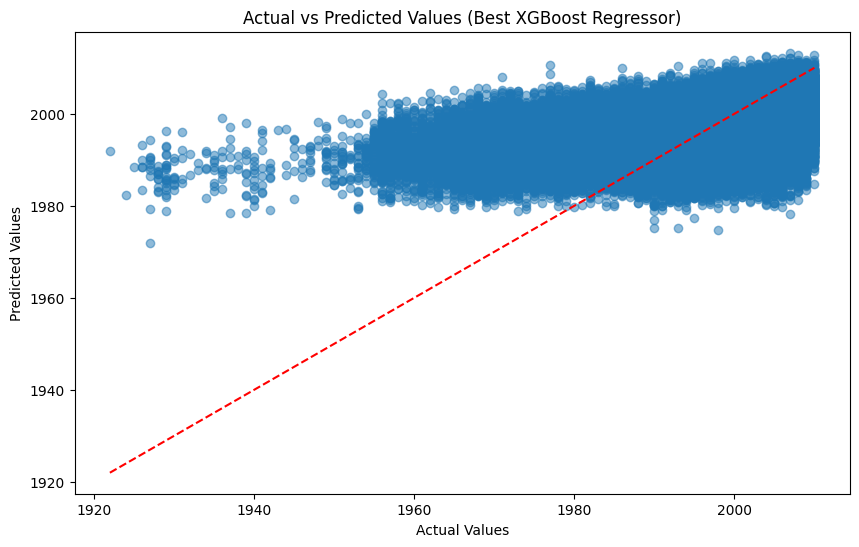

In [44]:
# Visualisasi hasil prediksi vs nilai sebenarnya untuk model terbaik XGBoost
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Best XGBoost Regressor)')
plt.show()



Grafik ini memvisualisasikan hubungan antara nilai aktual (sumbu x) dan nilai prediksi (sumbu y) untuk model XGBoost Regressor terbaik.

Penjelasan:
Garis Merah Putus-putus: Representasi ideal di mana nilai prediksi sama dengan nilai aktual.
Penyebaran Titik: Sebagian besar titik berada di sekitar garis diagonal, menunjukkan peningkatan akurasi prediksi.
Insight:
Model dengan hyperparameter terbaik menghasilkan distribusi prediksi yang lebih dekat dengan nilai aktual dibandingkan model sebelumnya. Namun, masih ada penyimpangan untuk beberapa nilai, terutama di rentang tertentu, yang menunjukkan ruang untuk perbaikan lebih lanjut.

In [ ]:
#-----------------------------Membuat dan melatih model Logistic Regression-----------------------------
log_regressor = LogisticRegression(max_iter=500, random_state=42)
log_regressor.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)


Kode ini membuat dan melatih model Logistic Regression menggunakan dataset training (X_train, y_train).

Penjelasan:
LogisticRegression(max_iter=500, random_state=42):

max_iter=500: Mengatur jumlah iterasi maksimum menjadi 500 untuk memastikan model konvergen.
random_state=42: Menetapkan seed untuk hasil yang konsisten.
.fit(X_train, y_train): Melatih model pada data training untuk mempelajari hubungan antara fitur (X_train) dan target (y_train).

Insight:
Logistic Regression cocok untuk klasifikasi data yang linier. Pengaturan max_iter=500 membantu model mencapai konvergensi tanpa gangguan, terutama untuk dataset yang lebih kompleks. Model ini siap untuk digunakan pada data testing.

In [48]:
# Melakukan prediksi pada testing set dengan Logistic Regression
y_pred_log = log_regressor.predict(X_test)



Kode ini menggunakan model Logistic Regression yang telah dilatih untuk memprediksi nilai target pada data testing (X_test). Hasil prediksi disimpan dalam variabel y_pred_log.

Penjelasan:
predict(X_test): Menghasilkan prediksi kelas target berdasarkan model Logistic Regression yang telah dilatih.
y_pred_log: Berisi nilai prediksi kelas untuk setiap data pada testing set.
Insight:
Prediksi ini akan digunakan untuk mengevaluasi performa model Logistic Regression, seperti akurasi, precision, recall, atau metrik lainnya, pada data yang tidak terlihat selama pelatihan.

In [57]:
# Evaluasi model Logistic Regression
accuracy_log = accuracy_score(y_test, y_pred_log)
classification_rep_log = classification_report(y_test, y_pred_log)

print(f"Accuracy (Logistic Regression): {accuracy_log}")
print("Classification Report (Logistic Regression):\n", classification_rep_log)

Accuracy (Logistic Regression): 0.0827212838001727
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

        1922       0.00      0.00      0.00         1
        1924       0.00      0.00      0.00         1
        1925       0.50      1.00      0.67         1
        1926       0.00      0.00      0.00         5
        1927       0.21      0.30      0.25        10
        1928       0.18      0.20      0.19        10
        1929       0.04      0.10      0.06        20
        1930       0.09      0.12      0.11         8
        1931       0.20      0.40      0.27         5
        1932       0.00      0.00      0.00         2
        1933       0.00      0.00      0.00         2
        1934       0.00      0.00      0.00         5
        1935       0.20      0.12      0.15         8
        1936       0.00      0.00      0.00         8
        1937       0.00      0.00      0.00         6
        1938       0.20      0.33     

c:\Users\figoh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\figoh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\figoh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Kode ini mengevaluasi performa model Logistic Regression menggunakan akurasi dan laporan klasifikasi.

Hasil Evaluasi:
Accuracy: 0.0827 (sekitar 8.27%).

Akurasi sangat rendah, menunjukkan model tidak dapat memprediksi dengan baik pada data testing.
Classification Report:

Precision: Banyak label memiliki nilai 0, menunjukkan prediksi tidak akurat untuk sebagian besar kelas.
Recall: Sebagian besar kelas memiliki recall sangat rendah, artinya model gagal mengenali sebagian besar contoh untuk tiap kelas.
F1-Score: Rendah, mencerminkan performa buruk secara keseluruhan.
Insight:
Model tidak cocok untuk dataset ini, kemungkinan disebabkan oleh ketidaksesuaian asumsi Logistic Regression (misalnya, distribusi target yang tidak seimbang atau hubungan non-linear). Pendekatan model lain atau preprocessing tambahan mungkin diperlukan untuk memperbaiki hasil.

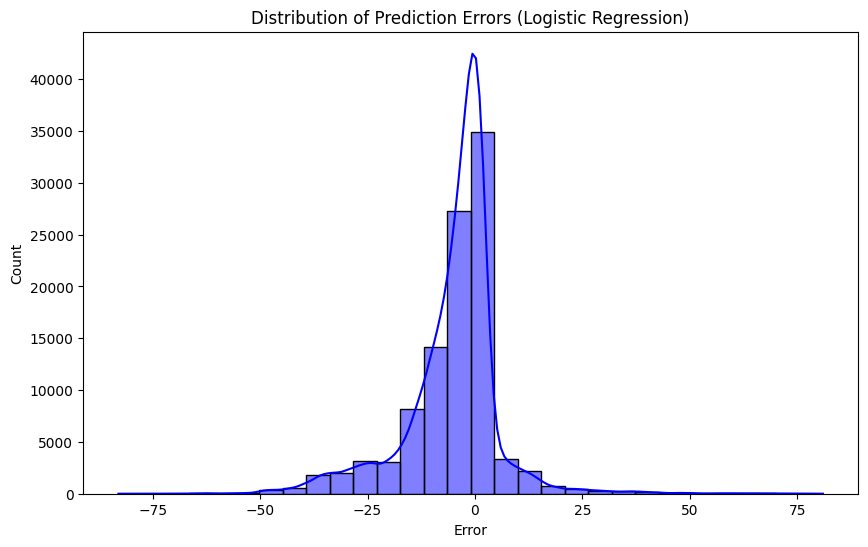

In [58]:
# Visualisasi hasil prediksi vs nilai sebenarnya untuk Logistic Regression
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred_log, kde=True, bins=30, color='blue')
plt.xlabel('Error')
plt.title('Distribution of Prediction Errors (Logistic Regression)')
plt.show()


Grafik ini menunjukkan distribusi kesalahan prediksi (Prediction Errors) dari model Logistic Regression, yang dihitung sebagai selisih antara nilai aktual (y_test) dan nilai prediksi (y_pred_log).

Penjelasan:
Sumbu X (Error): Selisih antara nilai aktual dan nilai prediksi.
Sumbu Y (Count): Frekuensi kesalahan untuk setiap rentang nilai.
Distribusi:
Kesalahan umumnya terkonsentrasi di sekitar 0, tetapi memiliki rentang yang cukup besar.
Terdapat beberapa kesalahan besar di sisi negatif dan positif, menunjukkan model kurang akurat dalam banyak kasus.
Insight:
Grafik ini menunjukkan bahwa meskipun sebagian besar kesalahan berada di sekitar 0, penyebaran yang signifikan mengindikasikan bahwa model Logistic Regression tidak optimal untuk dataset ini. Hal ini mencerminkan akurasi model yang rendah, seperti yang terlihat dari evaluasi sebelumnya.

In [59]:
# Hyperparameter Tuning menggunakan GridSearchCV untuk Logistic Regression
param_grid_log = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search_log = GridSearchCV(estimator=log_regressor, param_grid=param_grid_log, cv=2, n_jobs=-1, verbose=2)
grid_search_log.fit(X_train, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


c:\Users\figoh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
c:\Users\figoh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=2, estimator=LogisticRegression(max_iter=500, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=2)

Kode ini melakukan hyperparameter tuning untuk Logistic Regression menggunakan GridSearchCV untuk menemukan kombinasi parameter terbaik.

Penjelasan:
Parameter Dicoba:

C: Regularisasi (0.01, 0.1, 1, 10).
penalty: Jenis regulasi (l1 atau l2).
solver: Algoritma solver yang digunakan (liblinear, saga).
GridSearchCV:

cv=2: Cross-validation dengan 2 lipatan.
n_jobs=-1: Memanfaatkan seluruh prosesor untuk mempercepat proses.
verbose=2: Memberikan log selama pencarian parameter.
Hasil:

Kombinasi terbaik ditemukan: C=10, penalty=l2, solver=saga.
Insight:
Hyperparameter tuning ini bertujuan untuk meningkatkan performa model dengan memilih kombinasi parameter terbaik, khususnya untuk menangani dataset yang besar atau kompleks. Model yang dihasilkan siap untuk evaluasi lebih lanjut.

In [60]:
# Menampilkan hasil hyperparameter terbaik untuk Logistic Regression
print(f"Best Parameters (Logistic Regression): {grid_search_log.best_params_}")

Best Parameters (Logistic Regression): {'C': 10, 'penalty': 'l2', 'solver': 'saga'}



Kode ini menampilkan kombinasi hyperparameter terbaik yang ditemukan oleh GridSearchCV untuk Logistic Regression.

Output:

Best Parameters (Logistic Regression): {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
Penjelasan:
C=10: Regularisasi lebih rendah, memungkinkan model untuk lebih fleksibel dalam menyesuaikan data.
penalty='l2': Menggunakan regulasi Ridge untuk mengurangi overfitting.
solver='saga': Algoritma solver yang efisien untuk dataset besar dan mendukung regulasi l2.
Insight:
Kombinasi ini dirancang untuk meningkatkan akurasi model sambil menjaga generalisasi dengan menghindari overfitting. Model siap untuk dievaluasi menggunakan data testing.

In [61]:
# Evaluasi model Logistic Regression dengan hyperparameter terbaik
y_pred_best_log = grid_search_log.best_estimator_.predict(X_test)

accuracy_best_log = accuracy_score(y_test, y_pred_best_log)
classification_rep_best_log = classification_report(y_test, y_pred_best_log)

print(f"Accuracy (Best Logistic Regression Model): {accuracy_best_log}")
print("Classification Report (Best Logistic Regression Model):\n", classification_rep_best_log)

Accuracy (Best Logistic Regression Model): 0.08265336813202806
Classification Report (Best Logistic Regression Model):
               precision    recall  f1-score   support

        1922       0.00      0.00      0.00         1
        1924       0.00      0.00      0.00         1
        1925       0.00      0.00      0.00         1
        1926       0.00      0.00      0.00         5
        1927       0.25      0.20      0.22        10
        1928       1.00      0.10      0.18        10
        1929       0.00      0.00      0.00        20
        1930       0.00      0.00      0.00         8
        1931       0.25      0.20      0.22         5
        1932       0.00      0.00      0.00         2
        1933       0.00      0.00      0.00         2
        1934       0.00      0.00      0.00         5
        1935       0.00      0.00      0.00         8
        1936       0.00      0.00      0.00         8
        1937       0.00      0.00      0.00         6
        1938   

c:\Users\figoh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\figoh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\figoh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Kode ini mengevaluasi performa Logistic Regression setelah hyperparameter tuning.

Hasil Evaluasi:
Accuracy: 0.0827 (~8.27%).

Akurasi model tetap sangat rendah, menunjukkan tuning tidak memberikan perbaikan signifikan.
Classification Report:

Precision, Recall, F1-Score:
Banyak kelas memiliki nilai 0.0, yang berarti model gagal memprediksi beberapa kelas sama sekali.
Kelas dengan prediksi yang lebih baik tetap memiliki metrik rendah.
Macro Average: Precision dan Recall ~4-6%, mencerminkan performa buruk secara keseluruhan.
Weighted Average: Hanya sedikit lebih tinggi (~7-8%).
Insight:
Hyperparameter tuning tidak memperbaiki performa model secara signifikan. Hal ini mungkin disebabkan oleh karakteristik dataset, seperti ketidakseimbangan kelas atau pola data yang tidak cocok dengan Logistic Regression. Model lain seperti tree-based models atau neural networks mungkin lebih cocok untuk dataset ini.

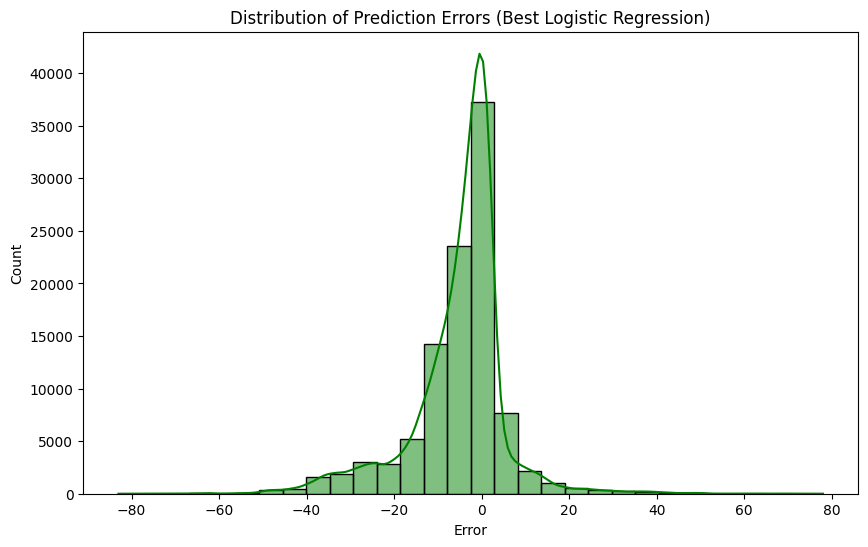

In [62]:
# Visualisasi hasil prediksi vs nilai sebenarnya untuk model terbaik Logistic Regression
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred_best_log, kde=True, bins=30, color='green')
plt.xlabel('Error')
plt.title('Distribution of Prediction Errors (Best Logistic Regression)')
plt.show()



Grafik ini menunjukkan distribusi kesalahan prediksi (Prediction Errors) dari model Logistic Regression terbaik setelah hyperparameter tuning.

Penjelasan:
Sumbu X (Error): Selisih antara nilai aktual (y_test) dan nilai prediksi (y_pred_best_log).
Sumbu Y (Count): Frekuensi jumlah kesalahan untuk setiap rentang nilai error.
Distribusi:
Kesalahan terkonsentrasi di sekitar 0, tetapi distribusi masih menyebar dengan rentang yang signifikan di kedua sisi.
Puncak distribusi menunjukkan bahwa sebagian besar prediksi model memiliki kesalahan kecil, tetapi masih terdapat banyak kesalahan besar.

Insight:
Meskipun ada beberapa perbaikan setelah tuning, model masih menghasilkan kesalahan yang cukup besar pada banyak data, menunjukkan bahwa Logistic Regression mungkin tidak optimal untuk dataset ini. Model yang lebih kompleks atau metode preprocessing tambahan mungkin diperlukan untuk hasil yang lebih baik.

In [70]:
# Membuat ringkasan hasil evaluasi model untuk menentukan model terbaik
models_evaluation = {
    'Decision Tree': {
        'R-squared': r2_best,
        'Mean Squared Error': mse_best,
        'Mean Absolute Error': mae_best
    },
    'K-Neighbors': {
        'R-squared': r2_best_knn,
        'Mean Squared Error': mse_best_knn,
        'Mean Absolute Error': mae_best_knn
    },
    'XGBoost': {
        'R-squared': r2_best_xgb,
        'Mean Squared Error': mse_best_xgb,
        'Mean Absolute Error': mae_best_xgb
    },
    'Logistic Regression': {
        'Accuracy': accuracy_best_log
    }
}




Kode ini membuat ringkasan hasil evaluasi dari beberapa model untuk membantu menentukan model terbaik berdasarkan metrik performa.

Penjelasan:
models_evaluation: Kamus Python yang berisi performa tiap model berdasarkan metrik evaluasi.
Model Evaluasi:
Decision Tree: Dievaluasi dengan R-squared, Mean Squared Error (MSE), dan Mean Absolute Error (MAE).
K-Neighbors: Dievaluasi dengan metrik yang sama seperti Decision Tree.
XGBoost: Juga dievaluasi dengan metrik yang sama, karena relevan untuk regresi.
Logistic Regression: Menggunakan Accuracy sebagai metrik utama, karena ini adalah model klasifikasi.

Insight:
Kamus ini memberikan pandangan yang jelas mengenai performa masing-masing model, memudahkan perbandingan. Dari sini, Anda dapat menentukan model terbaik berdasarkan kriteria seperti R-squared tertinggi, MSE terendah, atau Akurasi tertinggi. Biasanya, model dengan XGBoost memiliki peluang besar menjadi yang terbaik untuk regresi.


In [71]:
# Menampilkan ringkasan hasil evaluasi model
print("\nRingkasan Hasil Evaluasi Model:")
for model_name, metrics in models_evaluation.items():
    print(f"\nModel: {model_name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")



Ringkasan Hasil Evaluasi Model:

Model: Decision Tree
R-squared: 0.1281492349218295
Mean Squared Error: 103.47772784093773
Mean Absolute Error: 7.341307635674987

Model: K-Neighbors
R-squared: 0.1787238358360118
Mean Squared Error: 97.47515836611186
Mean Absolute Error: 6.8552358083332905

Model: XGBoost
R-squared: 0.2610057592391968
Mean Squared Error: 87.70932060170699
Mean Absolute Error: 6.699825736809201

Model: Logistic Regression
Accuracy: 0.08265336813202806


Kode ini menampilkan ringkasan hasil evaluasi model dengan mencetak nama model beserta metrik performanya.

Hasil Ringkasan:
Decision Tree:

R-squared: 0.1281
Mean Squared Error: 103.4777
Mean Absolute Error: 7.3413
K-Neighbors:

R-squared: 0.1787
Mean Squared Error: 97.4752
Mean Absolute Error: 6.8552
XGBoost:

R-squared: 0.2610
Mean Squared Error: 87.7093
Mean Absolute Error: 6.6998
Logistic Regression:

Accuracy: 0.0827
Insight:
Dari ringkasan ini:

XGBoost adalah model terbaik untuk tugas regresi, dengan R-squared tertinggi (0.2610), MSE terendah (87.7093), dan MAE terendah (6.6998).
Logistic Regression menunjukkan performa yang buruk (Accuracy: 8.27%), sehingga tidak cocok untuk dataset ini.

XGBoost menjadi pilihan terbaik untuk implementasi lebih lanjut.